In [1]:
from PIL import Image
import numpy as np

# Load the image
image_path = "neg/0004.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to RGB (if not already in that mode)
image_rgb = image.convert("RGB")

# Convert image to numpy array
image_array = np.array(image_rgb)

# Define the colors provided in RGBA format
colors_provided = [
    [110, 41, 253, 255],
    [107, 38, 249, 255],
    [130, 82, 238, 255],
    [49, 0, 246, 255],
    [167, 129, 228, 255],
    [139, 53, 250, 255],
    [50, 2, 240, 255],
]

# Calculate the overall range for RGB values
colors_rgb = [color[:3] for color in colors_provided]
overall_lower = np.min(colors_rgb, axis=0)
overall_upper = np.max(colors_rgb, axis=0)

# Define a function to replace colors within the range
def replace_colors_with_range(image_array, replacement_color, lower_bound, upper_bound):
    # Create a mask for pixels within the range
    color_mask = np.all((image_array >= lower_bound) & (image_array <= upper_bound), axis=-1)

    # Replace pixels within the range with the replacement color
    image_array[color_mask] = replacement_color

    return image_array

# Define the replacement color (e.g., white)
replacement_color = np.array([233, 234, 226])  # Replace with desired RGB color

# Apply the function with the overall range
processed_image_array = replace_colors_with_range(
    image_array, replacement_color, overall_lower, overall_upper
)

# Convert back to an image
processed_image = Image.fromarray(processed_image_array)

# Save the processed image
output_path = "negreults/0004rwc.jpg"  # Replace with the desired output path
processed_image.save(output_path)

print(f"Processed image saved to {output_path}")


Processed image saved to negreults/0004rwc.jpg


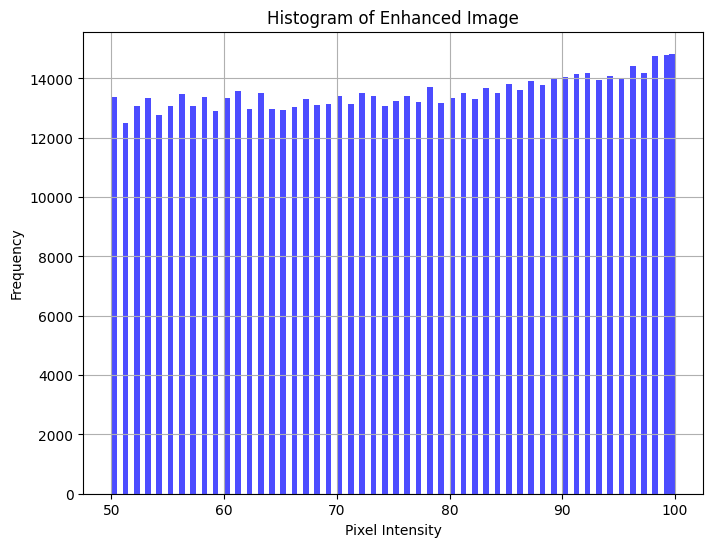

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image in grayscale
image_path = "neg/0004.jpg"  # Replace this with your image path
img = cv2.imread(image_path, 0)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl_img = clahe.apply(img)

# Plot the histogram of the enhanced image
plt.figure(figsize=(8, 6))
plt.hist(cl_img.flat, bins=100, range=(50, 100), color='blue', alpha=0.7)
plt.title("Histogram of Enhanced Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# # Save the enhanced image
# output_path = "enhanced_image.jpg"  # Replace this with your desired output path
# cv2.imwrite(output_path, cl_img)

# print(f"Enhanced image saved at {output_path}")


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image in grayscale
image_path = "neg/0004.jpg"  # Replace this with your image path
img = cv2.imread(image_path, 0)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl_img = clahe.apply(img)

# Apply Binary Thresholding
threshold_value = 70  # You can adjust this value
_, binary_thresh = cv2.threshold(cl_img, threshold_value, 255, cv2.THRESH_BINARY)

# Apply Otsu's Thresholding
_, otsu_thresh = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
cv2.imshow("Original Image", img)
cv2.imshow("CLAHE Image", cl_img)
cv2.imshow("Binary Thresholding", binary_thresh)
cv2.imshow("Otsu's Thresholding", otsu_thresh)

# Wait until a key is pressed and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the thresholded images

cv2.imwrite("negreults/binary_threshold_00041.jpg", binary_thresh)
cv2.imwrite("negreults/otsu_threshold_00041.jpg", otsu_thresh)
cv2.imwrite("negreults/cl_img_00041.jpg", cl_img)
# cv2.imwrite("otsu_threshold.jpg", otsu_thresh)
print("Thresholded images saved!")


Thresholded images saved!
